## Importing libraries and data sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline

In [3]:
path=r'C:\Users\Shelb\OneDrive\Documents\CF Coursework\Advanced Analytics and Dashboard Design\2022 WA State CAFV Project'

In [4]:
df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','clean_EV_title_and_reg_activity_12_2022.csv'),index_col=False)

In [5]:
df.head()

,Unnamed: 0,Clean_Alternative _Fuel _Vehicle _Type,VIN,Model_Year,Make,Model,New_or_Used_Vehicle,Sale_Price,DOL_Transaction_Date,Transaction_Type,...,Odometer_Code,Transportation_Electrification_Fee_Paid,Hybrid_Vehicle_Electrification_Fee_Paid,Electric_Utility,Out_of_State_Buyer?,2015_HB_2778_Eligible?,2015_HB_2778_Transaction_Eligible?,2015_HB_2778_Vehicle_Model_Eligibile?,2015_HB_2778_Missing_Vehicle_Information,2019_HB_2042_Eligible?
0,0,Battery Electric Vehicle (BEV),7FCTGAAA8N,2022,RIVIAN,R1T,New,0,August 16 2022,Original Registration,...,Odometer reading is not collected at time of r...,No,No,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Local_Resident,Not Eligible,Transaction Not Eligible,Eligible Vehicle Model,All Vehicle Information Present,Not Eligible
1,1,Battery Electric Vehicle (BEV),5YJ3E1EBXN,2022,TESLA,Model 3,New,70440,October 11 2022,Original Title,...,Actual Mileage,Not Applicable,Not Applicable,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Local_Resident,Not Eligible,Transaction Not Eligible,Eligible Vehicle Model,All Vehicle Information Present,Not Eligible
2,2,Battery Electric Vehicle (BEV),5YJ3E1EBXN,2022,TESLA,Model 3,New,0,October 11 2022,Original Registration,...,Odometer reading is not collected at time of r...,No,No,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Local_Resident,Not Eligible,Transaction Not Eligible,Eligible Vehicle Model,All Vehicle Information Present,Not Eligible
3,3,Battery Electric Vehicle (BEV),1G1FX6S07H,2017,CHEVROLET,Bolt EV,Used,21219,October 15 2019,Original Title,...,Actual Mileage,Not Applicable,Not Applicable,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Local_Resident,Not Eligible,Transaction Not Eligible,Eligible Vehicle Model,Cannot Determine Eligibility,Eligible
4,4,Battery Electric Vehicle (BEV),1G1FX6S07H,2017,CHEVROLET,Bolt EV,Used,0,October 15 2019,Original Registration,...,Odometer reading is not collected at time of r...,No,No,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Local_Resident,Not Eligible,Transaction Not Eligible,Eligible Vehicle Model,All Vehicle Information Present,Not Eligible


In [6]:
df.shape

(633862, 36)

In [7]:
df.columns

Index(['Unnamed: 0', 'Clean_Alternative _Fuel _Vehicle _Type', 'VIN',
       'Model_Year', 'Make', 'Model', 'New_or_Used_Vehicle', 'Sale_Price',
       'DOL_Transaction_Date', 'Transaction_Type', 'Transaction_Year',
       'Electric_Vehicle_Fee_Paid', 'County', 'City', 'Postal_Code',
       'Electric_Range', 'Base_MSRP', 'Sale_Date', 'Vehicle_Primary_Use',
       'State_of_Residence', 'DOL Vehicle ID', 'Legislative_District',
       'Meets_2019_HB_2042_Electric_Range_Requirement',
       'Meets_2019_HB_2042_Sale_Date_Requirement',
       'Meets_2019_HB_2042_Sale_Price/Value_Requirement', 'Odometer_Reading',
       'Odometer_Code', 'Transportation_Electrification_Fee_Paid',
       'Hybrid_Vehicle_Electrification_Fee_Paid', 'Electric_Utility',
       'Out_of_State_Buyer?', '2015_HB_2778_Eligible?',
       '2015_HB_2778_Transaction_Eligible?',
       '2015_HB_2778_Vehicle_Model_Eligibile?',
       '2015_HB_2778_Missing_Vehicle_Information', '2019_HB_2042_Eligible?'],
      dtype='object')

## Preprocessing data for time series analysis

In [8]:
# To create a dataframe with only transaction dates and vehicle id numbers
df_tseries=df[['DOL_Transaction_Date','DOL Vehicle ID']]

In [9]:
df_tseries.rename(columns={'DOL_Transaction_Date':'Transaction_Date'},inplace=True)

In [10]:
df_tseries.rename(columns={'DOL Vehicle ID':'Vehicle_ID'},inplace=True)

In [11]:
# To check output
df_tseries

,Transaction_Date,Vehicle_ID
0,August 16 2022,216581403
1,October 11 2022,219017578
2,October 11 2022,219017578
3,October 15 2019,477229294
4,October 15 2019,477229294
...,...,...
633857,April 13 2020,103647533
633858,January 16 2020,6397107
633859,January 16 2020,6397107
633860,November 30 2020,6397107


In [12]:
# To check data types
df_tseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633862 entries, 0 to 633861
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Transaction_Date  633862 non-null  object
 1   Vehicle_ID        633862 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.7+ MB


In [13]:
# To change the data type of Transaction_Date to datetime64
df_tseries['Transaction_Date']=pd.to_datetime(df_tseries['Transaction_Date'])

In [14]:
# To extract the year from Transaction_Date
df_tseries['Year'] = df_tseries['Transaction_Date'].dt.year

In [15]:
# To extract the month from Transaction_Date
df_tseries['Month'] = df_tseries['Transaction_Date'].dt.month

In [16]:
df_tseries=df_tseries.set_index('Transaction_Date')

In [17]:
df_tseries['YearMon'] = df_tseries.Year.astype('str') + '-' + df_tseries.Month.astype('str')

In [18]:
# To check output
df_tseries.head()

,Vehicle_ID,Year,Month,YearMon
Transaction_Date,,,,
2022-08-16,216581403,2022,8,2022-8
2022-10-11,219017578,2022,10,2022-10
2022-10-11,219017578,2022,10,2022-10
2019-10-15,477229294,2019,10,2019-10
2019-10-15,477229294,2019,10,2019-10


In [19]:
# To confirm data type change
df_tseries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 633862 entries, 2022-08-16 to 2021-12-29
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Vehicle_ID  633862 non-null  int64 
 1   Year        633862 non-null  int64 
 2   Month       633862 non-null  int64 
 3   YearMon     633862 non-null  object
dtypes: int64(3), object(1)
memory usage: 24.2+ MB


In [20]:
# To save df_tseries as a csv file for Tableau visualization and reporting
df_tseries.to_csv(os.path.join(path,'02 Data','Prepared Data','CAFV_Time_Series_Data.csv'))

In [21]:
# To group vehicle ID count by YearMon and save it as a df object
data_to_plot = df_tseries.groupby(['YearMon'])['Vehicle_ID'].count().reset_index()

In [22]:
# To revert Year to string data type and add -01 in the day position
data_to_plot['YearMon'] = data_to_plot.YearMon.astype('str') + '-01'

In [23]:
# To set YearMon to datetime and sort values
data_to_plot['datetime'] = pd.to_datetime(data_to_plot['YearMon'])
data_to_plot=data_to_plot.sort_values(by="datetime")

In [24]:
# To set YearMon as the index column
data_to_plot = data_to_plot.set_index('datetime')
data_to_plot.drop(['YearMon'], axis=1, inplace=True)
data_to_plot.head(10)

,Vehicle_ID
datetime,
2010-01-01,1
2010-02-01,6
2010-03-01,17
2010-04-01,12
2010-05-01,7
2010-06-01,4
2010-07-01,13
2010-08-01,11
2010-09-01,6


In [25]:
data_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155 entries, 2010-01-01 to 2022-11-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Vehicle_ID  155 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


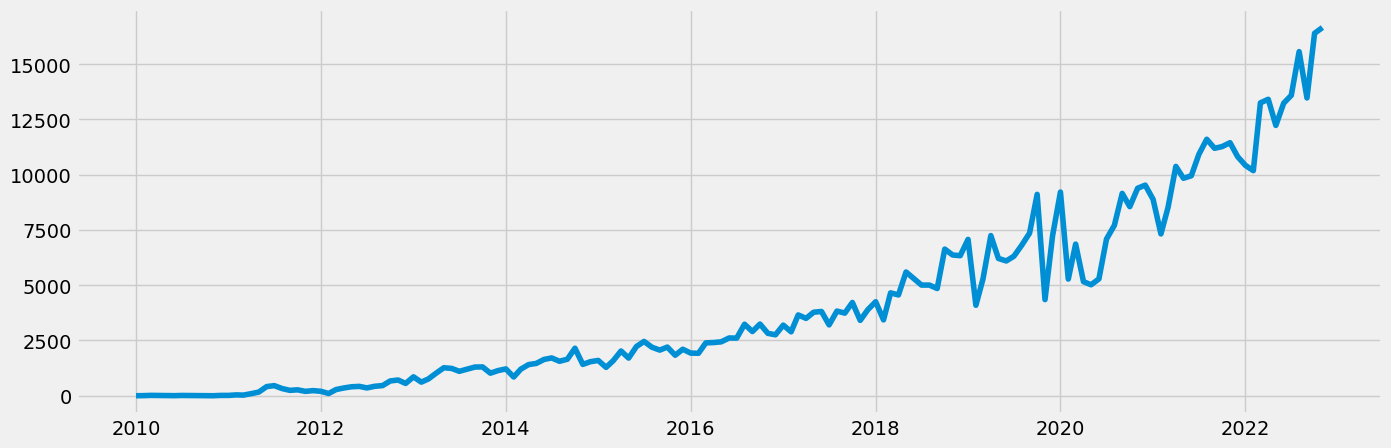

In [26]:
# To plot the vehicle ID and transaction date data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_to_plot)

In [27]:
# To check for missing values
data_to_plot.isnull().sum()

Vehicle_ID    0
dtype: int64

In [28]:
# To check for duplicates
dups=data_to_plot.duplicated()
dups.sum()

4

In [29]:
# To drop duplicates
data_to_plot.drop_duplicates()

,Vehicle_ID
datetime,
2010-01-01,1
2010-02-01,6
2010-03-01,17
2010-04-01,12
2010-05-01,7
...,...
2022-07-01,13590
2022-08-01,15568
2022-09-01,13472


## Time series analysis: decomposition

In [30]:
# To decompose the time series using an additive model
decomposition=sm.tsa.seasonal_decompose(data_to_plot,model='additive')

In [31]:
# To define a fixed size for all special charts.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

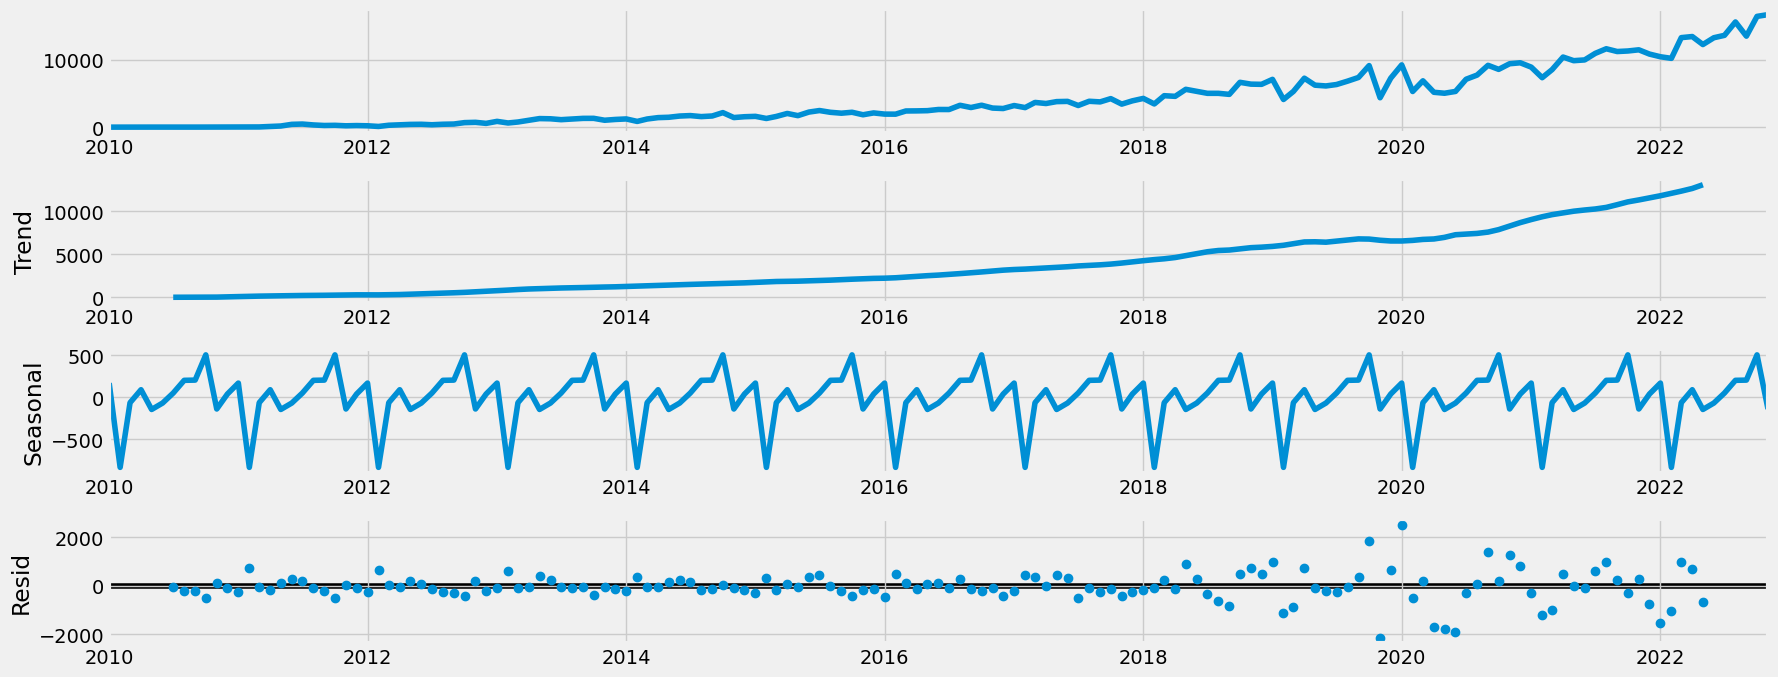

In [32]:
# Plot the separate components
decomposition.plot()
plt.show()

## Testing for stationarity

In [33]:
# To import the Dickey-Fuller test from statsmodels and define a function to print the correct output from the array
from statsmodels.tsa.stattools import adfuller

def dickey_fuller (timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test=adfuller(timeseries,autolag='AIC')
    result=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test [4].items():
        result['Critical Value (%s)'%key]=value
    print (result)
    
# To apply the test on the time series
dickey_fuller(data_to_plot['Vehicle_ID'])

Dickey-Fuller Stationarity test:
Test Statistic                   4.156932
p-value                          1.000000
Number of Lags Used             14.000000
Number of Observations Used    140.000000
Critical Value (1%)             -3.477945
Critical Value (5%)             -2.882416
Critical Value (10%)            -2.577902
dtype: float64


##### The test statistic is higher than the critical value, therefore there is a unit root. This means that the data is not stationary, as we can also see given its upward trend.

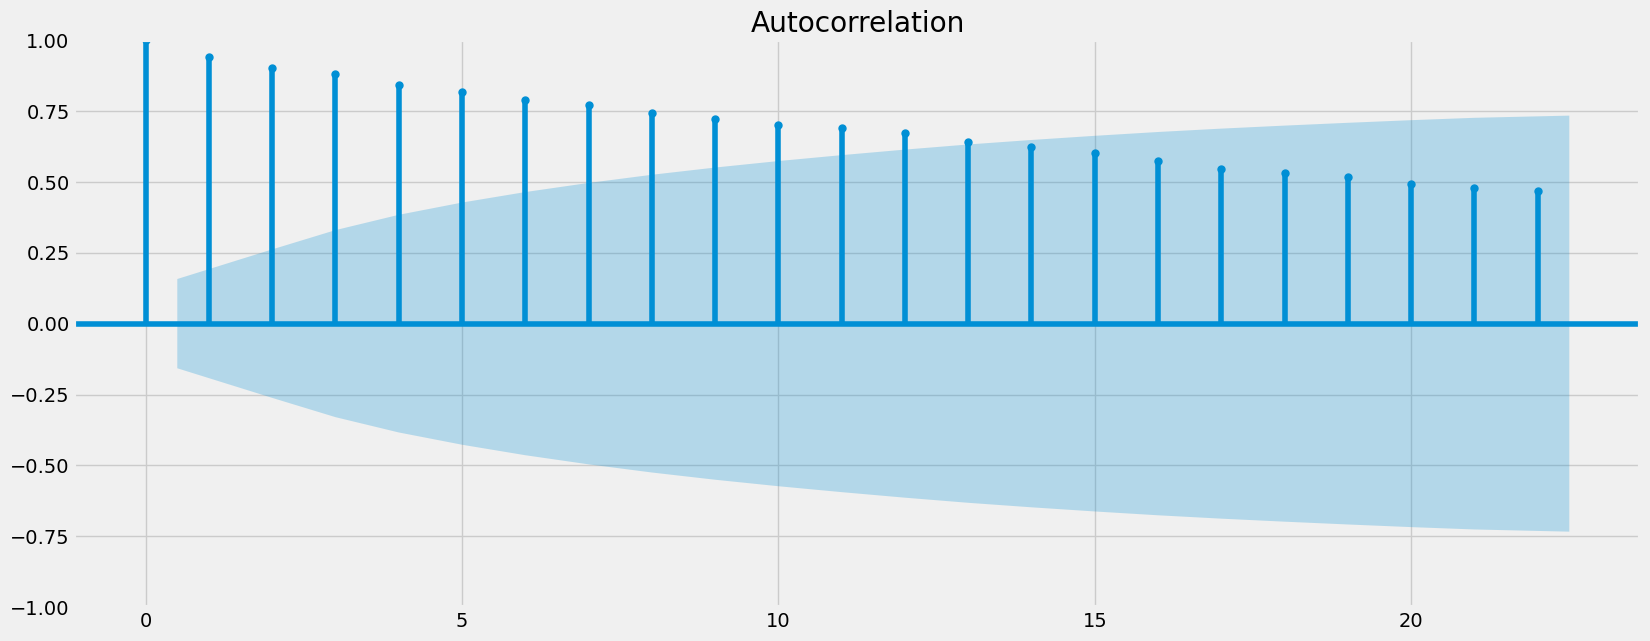

In [34]:
# To check the plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_to_plot)
plt.show()

## Stationarizing the Washington State title and registration data

In [35]:
# To difference the data to remove non stationarity
data_diff = data_to_plot - data_to_plot.shift(1)

In [36]:
# To remove any null values which may have resulted from differencing
data_diff.dropna(inplace=True)

In [37]:
data_diff.head()

,Vehicle_ID
datetime,
2010-02-01,5.0
2010-03-01,11.0
2010-04-01,-5.0
2010-05-01,-5.0
2010-06-01,-3.0


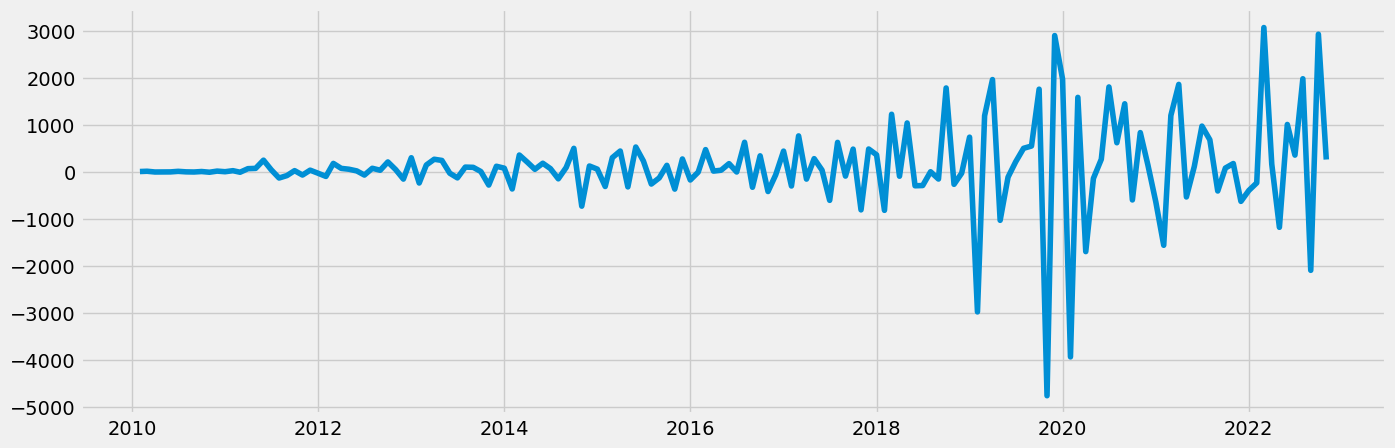

In [38]:
# To reexamine the time series curve after differencing
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [39]:
# To perform the dickey_fuller test on the differenced data
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.163058
p-value                          0.689282
Number of Lags Used             14.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64


##### Since the test statistic is not smaller than the critical value we can determine that the data is still not stationary.

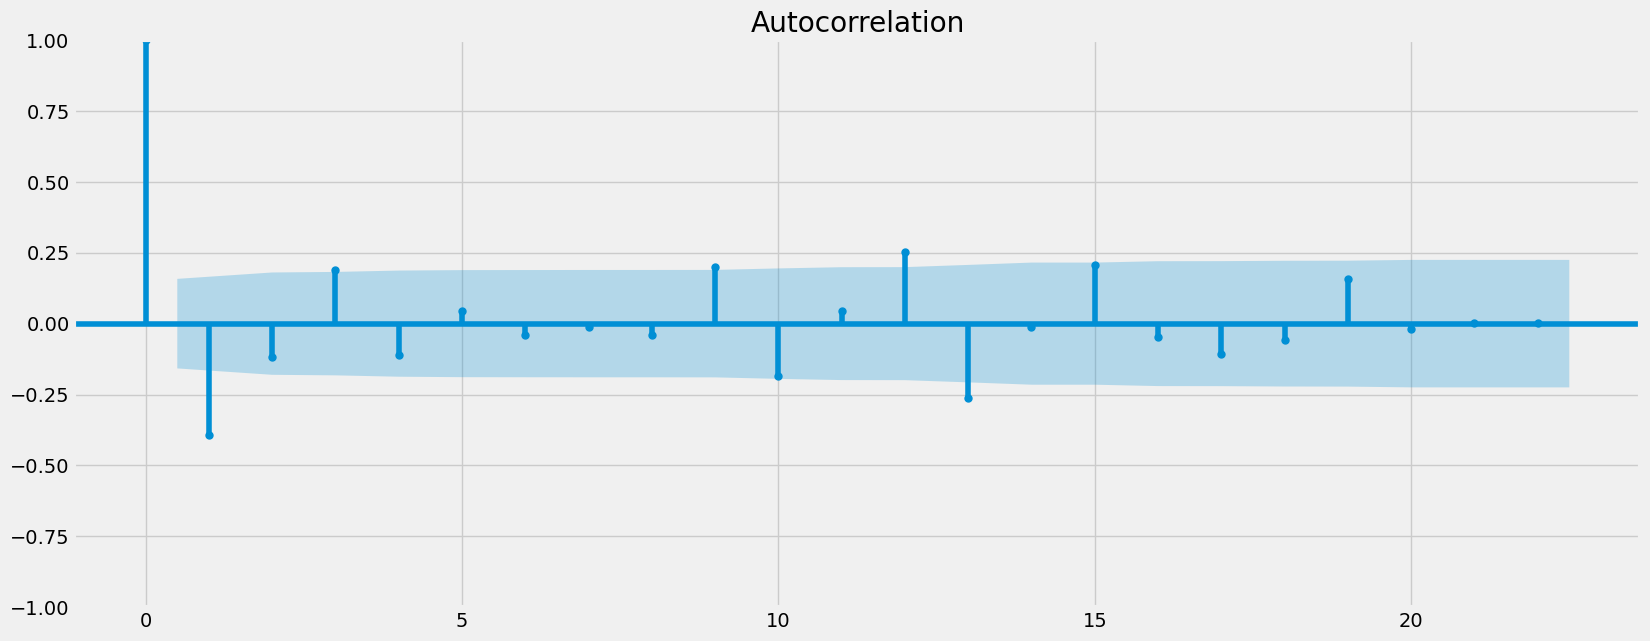

In [40]:
# To check the autocorrelation of the differenced data
plot_acf(data_diff)
plt.show()

In [41]:
# To difference the data again to remove non stationarity
data_diff2 = data_diff - data_diff.shift(1)

In [42]:
# To remove any null values which may have resulted from differencing
data_diff2.dropna(inplace=True)

In [43]:
data_diff.head()

,Vehicle_ID
datetime,
2010-02-01,5.0
2010-03-01,11.0
2010-04-01,-5.0
2010-05-01,-5.0
2010-06-01,-3.0


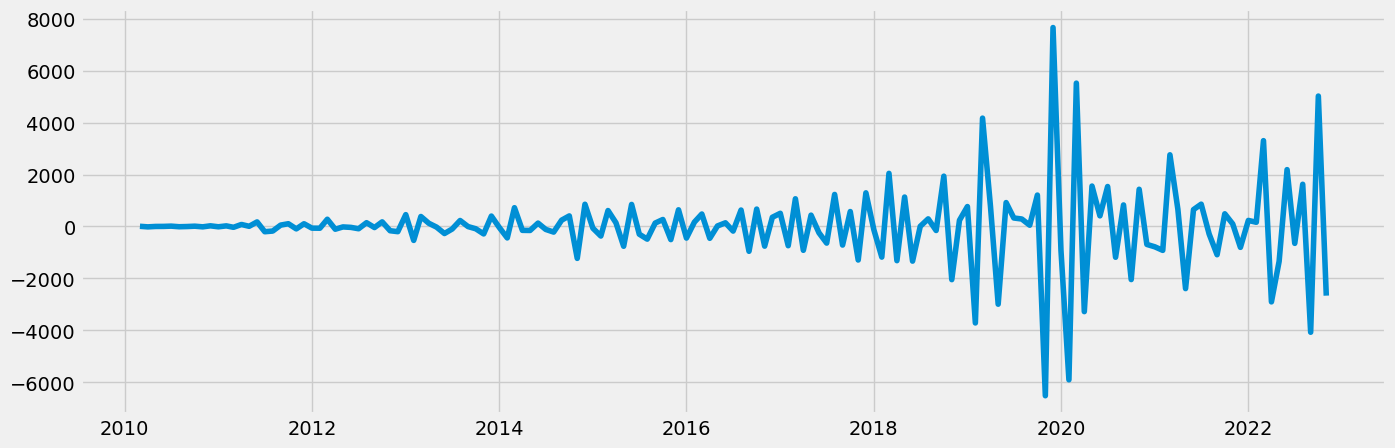

In [44]:
# To reexamine the time series curve after differencing again
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [45]:
# To perform the dickey_fuller test on the differenced data
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -7.008082e+00
p-value                        7.036840e-10
Number of Lags Used            1.400000e+01
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


##### Here the test statistic is smaller than the critical values, so we can determine that the data is now stationary.

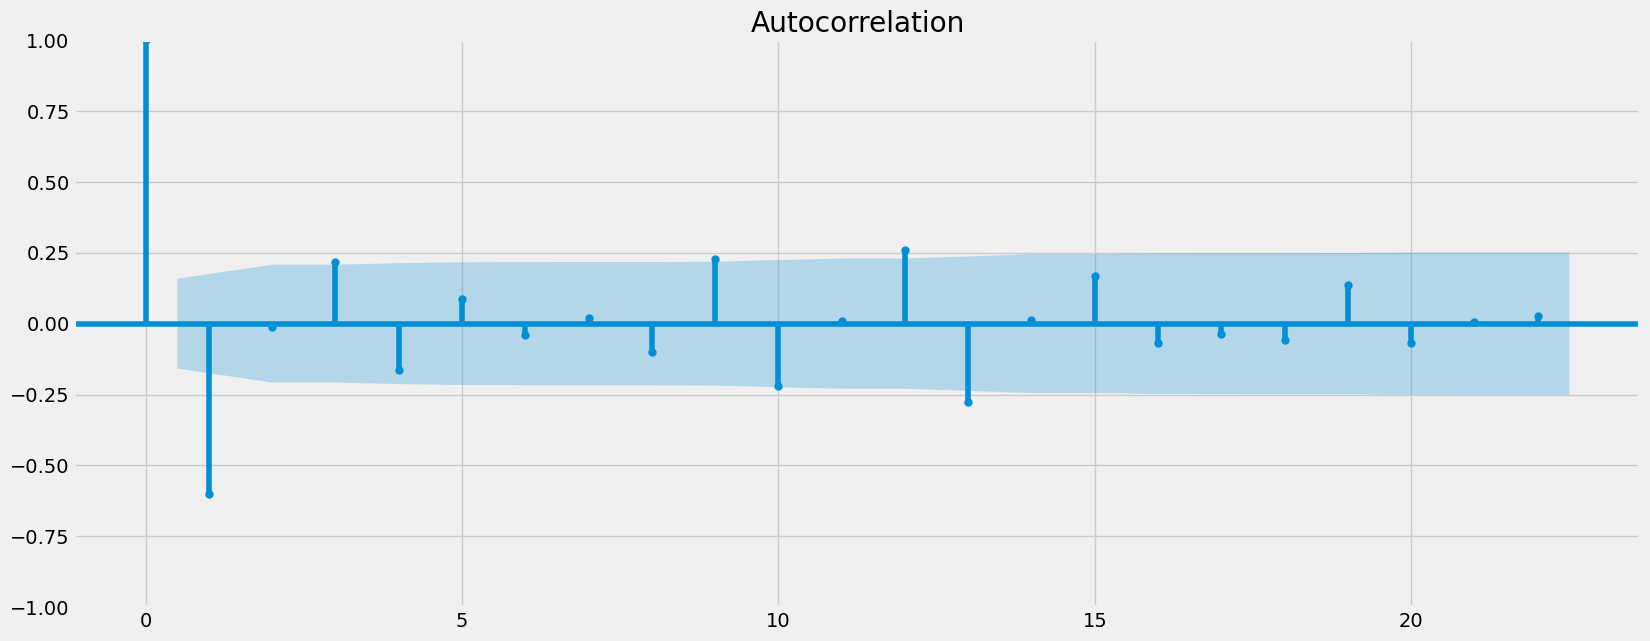

In [46]:
# To check the autocorrelation of the differenced data
plot_acf(data_diff2)
plt.show()

##### Autocorrelation has not changed since the last round of differentiation but there are still very few correlated lags